In [1]:
#load pandas
import pandas as pd 

In [2]:

data = pd.read_csv("master_csv/ThePrideProjectSurvey.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,Timestamp,Approximately how many games do you attend each season?,What is your favorite team?,Do you identify as LGBTQ+ ?,Did your favorite team host a Pride Night this season?,Did you attend Pride Night this season?,When planning future trips to the ballpark:,"If your team hosts a Pride Night, what do you think of the promotion and production? [Advertising]","If your team hosts a Pride Night, what do you think of the promotion and production? [Pre-Game Activities]","If your team hosts a Pride Night, what do you think of the promotion and production? [In-Game Entertainment/Features]","If your team hosts a Pride Night, what do you think of the promotion and production? [Promotional Items]",What is your overall impression of MLB Pride Night themes?,What is your favorite themed night or promotion to attend?
0,9/19/2019 22:26,43470,St. Louis Cardinals,No,Yes,"Didn't attend, but not because of Pride Night",I would go out of my way to attend on Pride Night,Just the right amount,Don't know/unaware of this feature,Don't know/unaware of this feature,Just the right amount,They’re great,I haven’t attended any
1,9/19/2019 22:28,43626,Atlanta Braves,No,Yes,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,Just the right amount,Don't know/unaware of this feature,Don't know/unaware of this feature,Don't know/unaware of this feature,I'm all for inclusion and hope it brings fans ...,"Star Wars Night, but themed nights don't reall..."
2,9/19/2019 22:29,43470,New York Yankees,No,I don't know,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,Don't know/unaware of this feature,Don't know/unaware of this feature,Don't know/unaware of this feature,Don't know/unaware of this feature,Don’t care,Don’t know
3,9/19/2019 22:29,43470,St. Louis Cardinals,Yes,I don't know,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,Just the right amount,Just the right amount,Don't know/unaware of this feature,Just the right amount,Very cool,Bring your dog to the park.
4,9/19/2019 22:30,43470,Atlanta Braves,Prefer not to answer,Yes,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,Just the right amount,Don't know/unaware of this feature,Don't know/unaware of this feature,Don't know/unaware of this feature,I don’t care,I don’t care


In [3]:
data.columns

Index(['Timestamp', 'Approximately how many games do you attend each season?',
       'What is your favorite team?', 'Do you identify as LGBTQ+ ?',
       'Did your favorite team host a Pride Night this season?',
       'Did you attend Pride Night this season?',
       'When planning future trips to the ballpark:',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [Advertising]',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [Pre-Game Activities]',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [In-Game Entertainment/Features]',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [Promotional Items]',
       'What is your overall impression of MLB Pride Night themes?',
       'What is your favorite themed night or promotion to attend?'],
      dtype='object')

In [4]:
#begin cleaning up the column names
data.rename(columns={"Approximately how many games do you attend each season?": "numgames", "What is your favorite team?": "favteam", "Do you identify as LGBTQ+ ?": "lgbtq", "Did your favorite team host a Pride Night this season?":"teampride"}, inplace=True)
data.columns

Index(['Timestamp', 'numgames', 'favteam', 'lgbtq', 'teampride',
       'Did you attend Pride Night this season?',
       'When planning future trips to the ballpark:',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [Advertising]',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [Pre-Game Activities]',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [In-Game Entertainment/Features]',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [Promotional Items]',
       'What is your overall impression of MLB Pride Night themes?',
       'What is your favorite themed night or promotion to attend?'],
      dtype='object')

In [5]:
data.rename(columns={"Did you attend Pride Night this season?": "attended", "When planning future trips to the ballpark:": "wouldgo", "If your team hosts a Pride Night,  what do you think of the promotion and production? [Advertising]": "ad_opinion", "If your team hosts a Pride Night,  what do you think of the promotion and production? [Pre-Game Activities]":"pregame_opinion"}, inplace=True)
data.columns

Index(['Timestamp', 'numgames', 'favteam', 'lgbtq', 'teampride', 'attended',
       'wouldgo', 'ad_opinion', 'pregame_opinion',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [In-Game Entertainment/Features]',
       'If your team hosts a Pride Night,  what do you think of the promotion and production? [Promotional Items]',
       'What is your overall impression of MLB Pride Night themes?',
       'What is your favorite themed night or promotion to attend?'],
      dtype='object')

In [6]:
data.rename(columns={"If your team hosts a Pride Night,  what do you think of the promotion and production? [In-Game Entertainment/Features]": "ingame_opinion", "If your team hosts a Pride Night,  what do you think of the promotion and production? [Promotional Items]": "item_opinion", "'What is your overall impression of MLB Pride Night themes?": "overall_impression", "What is your favorite themed night or promotion to attend?":"fav_theme"}, inplace=True)
data.columns

Index(['Timestamp', 'numgames', 'favteam', 'lgbtq', 'teampride', 'attended',
       'wouldgo', 'ad_opinion', 'pregame_opinion', 'ingame_opinion',
       'item_opinion',
       'What is your overall impression of MLB Pride Night themes?',
       'fav_theme'],
      dtype='object')

In [7]:
#make a new df that will group the favorite team, the identity, and the willingness to go to a Pride game

viz1_df=data[['favteam','lgbtq','wouldgo']]
viz1_df.head()

,favteam,lgbtq,wouldgo
0,St. Louis Cardinals,No,I would go out of my way to attend on Pride Night
1,Atlanta Braves,No,Pride Night would not influence my choice of game
2,New York Yankees,No,Pride Night would not influence my choice of game
3,St. Louis Cardinals,Yes,Pride Night would not influence my choice of game
4,Atlanta Braves,Prefer not to answer,Pride Night would not influence my choice of game


In [8]:
viz1_count = viz1_df.groupby(['favteam', 'lgbtq','wouldgo']).size() 

In [9]:
viz1_count

favteam               lgbtq                 wouldgo                                            
Arizona Diamondbacks  No                    I would go out of my way to attend on Pride Night       2
                                            I would go out of my way to avoid Pride Night           2
                                            Pride Night would not influence my choice of game       3
Atlanta Braves        No                    I would go out of my way to attend on Pride Night       3
                                            I would go out of my way to avoid Pride Night          28
                                            I would only attend if I liked the promotional item     1
                                            Pride Night would not influence my choice of game      31
                      Prefer not to answer  I would go out of my way to attend on Pride Night       1
                                            Pride Night would not influence my choice of

In [10]:
#we need to do some data cleaning next because there were some free-form answers that mess up the heatmap

#first we are going to pull the unique values for the column
#we are going to do the value cleanup manually for now

viz1_df.wouldgo.unique()

array(['I would go out of my way to attend on Pride Night',
       'Pride Night would not influence my choice of game',
       'I would go out of my way to avoid Pride Night',
       'I would only attend if I liked the promotional item', 'Undecided'],
      dtype=object)

In [11]:
#for now we will just set all of these to "Undecided"

#viz1_df["wouldgo"]=viz1_df["wouldgo"].replace("I don't live in STL, but I had family get me the merch from pride night because I wanted it so much","Undecided")
#viz1_df["wouldgo"]=viz1_df["wouldgo"].replace("Pride night might be a small incentive","Undecided")
#viz1_df["wouldgo"]=viz1_df["wouldgo"].replace("I will purposefully avoid touching any negros","Undecided")


#data["Age"]= data["Age"].replace(25.0, "Twenty five") 


In [12]:
#we need to assign numeric values to some of the text or else a heatmap won't work properly

pivot = viz1_df.pivot_table(index='favteam', columns='wouldgo', aggfunc=len)
pivot

lgbtq  \
wouldgo               I would go out of my way to attend on Pride Night   
favteam                                                                   
Arizona Diamondbacks                                                2.0   
Atlanta Braves                                                      7.0   
Baltimore Orioles                                                   2.0   
Boston Red Sox                                                      4.0   
Chicago Cubs                                                        1.0   
Chicago White Sox                                                   NaN   
Cincinnati Reds                                                     NaN   
Cleveland Indians                                                   1.0   
Colorado Rockies                                                    1.0   
Detroit Tigers                                                      3.0   
Houston Astros                                                      5.0   
Kansas City Royals                                                  1.0   
Los Angeles Angels                                                  1.0   
Los Angeles Dodgers                                                 5.0   
Miami Marlins                                                       2.0   
Milwaukee Brewers                                                   1.0   
Minnesota Twins                                                     1.0   
New York Mets                                                      13.0   
New York Yankees                                                    9.0   
Oakland Athletics                                                   5.0   
Philadelphia Phillies                                               5.0   
Pittsburgh Pirates                                                  2.0   
San Diego Padres                                                    1.0   
San Francisco Giants                                                3.0   
Seattle Mariners                                                    2.0   
St. Louis Cardinals                                                 4.0   
Texas Rangers                                                       1.0   
Toronto Blue Jays                                                   2.0   
Washington Nationals                                               11.0   

                                                                     \
wouldgo               I would go out of my way to avoid Pride Night   
favteam                                                               
Arizona Diamondbacks                                            2.0   
Atlanta Braves                                                 28.0   
Baltimore Orioles                                               2.0   
Boston Red Sox                                                  2.0   
Chicago Cubs                                                    4.0   
Chicago White Sox                                               1.0   
Cincinnati Reds                                                 2.0   
Cleveland Indians                                               NaN   
Colorado Rockies                                                2.0   
Detroit Tigers                                                  2.0   
Houston Astros                                                  7.0   
Kansas City Royals                                              1.0   
Los Angeles Angels                                              5.0   
Los Angeles Dodgers                                             3.0   
Miami Marlins                                                   NaN   
Milwaukee Brewers                                               2.0   
Minnesota Twins                                                 3.0   
New York Mets                                                   4.0   
New York Yankees                                                3.0   
Oakland Athletics                                               1.0   
Philadelphia Phillies           

In [13]:

#bring in what we need to make a heat chart
#reference http://financeandpython.com/SeabornDataVisualization/3/3.html

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

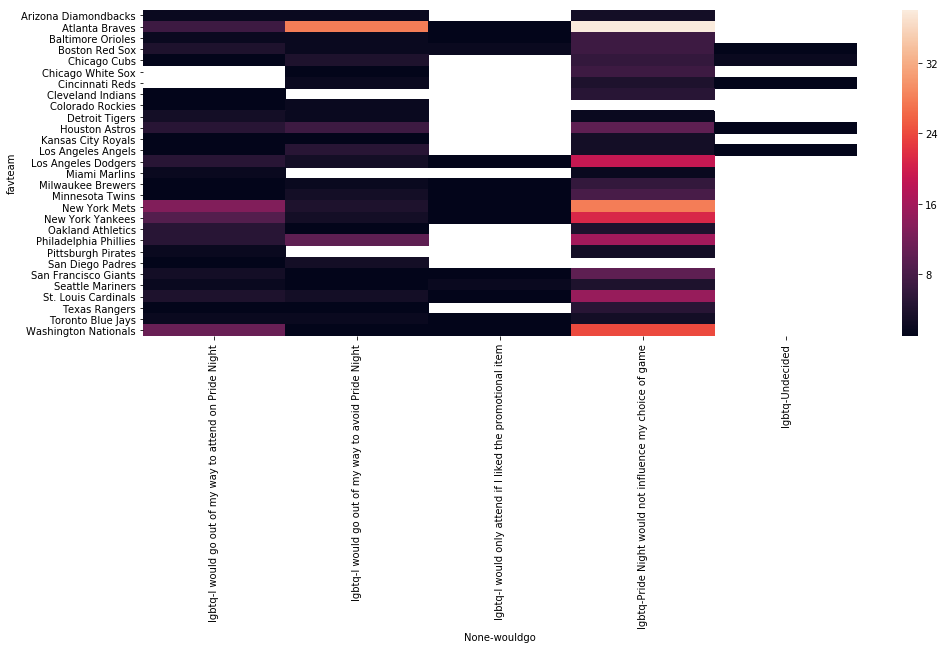

In [14]:
plt.figure(figsize=(16, 6))
sns.heatmap(pivot)
plt.show()

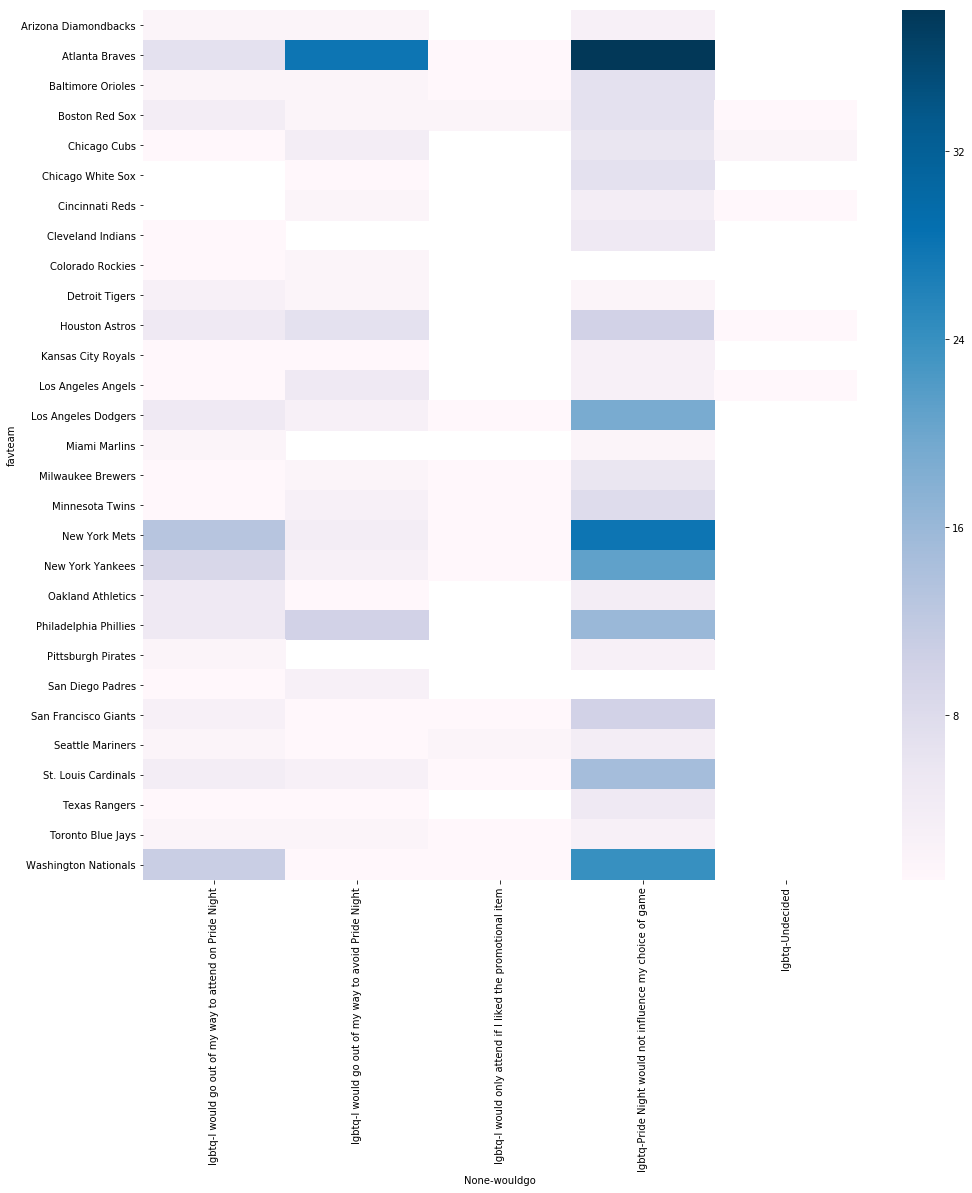

In [15]:
#try a different color palette

plt.figure(figsize=(16, 16))
sns.heatmap(pivot, cmap="PuBu")
plt.show()

In [16]:
viz1_df.head()

,favteam,lgbtq,wouldgo
0,St. Louis Cardinals,No,I would go out of my way to attend on Pride Night
1,Atlanta Braves,No,Pride Night would not influence my choice of game
2,New York Yankees,No,Pride Night would not influence my choice of game
3,St. Louis Cardinals,Yes,Pride Night would not influence my choice of game
4,Atlanta Braves,Prefer not to answer,Pride Night would not influence my choice of game


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021838742EF0>,
      dtype=object)

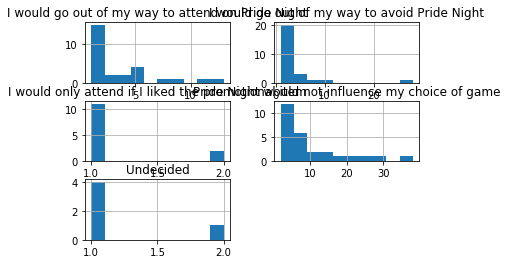

In [27]:
#now we will compare some of the responses between LGBTQ and non-LGBTQ people
#first we need to count up some values




pivot['lgbtq'].hist(bins=10)

In [51]:
viz2_df=data[['favteam','lgbtq','wouldgo']]
viz2_count = pd.DataFrame(viz2_df.groupby(['favteam', 'lgbtq','wouldgo']).size())


In [52]:
viz2_count.head()

0
favteam              lgbtq wouldgo                                              
Arizona Diamondbacks No    I would go out of my way to attend on Pride Night   2
                           I would go out of my way to avoid Pride Night       2
                           Pride Night would not influence my choice of game   3
Atlanta Braves       No    I would go out of my way to attend on Pride Night   3
                           I would go out of my way to avoid Pride Night      28

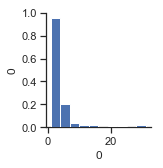

In [55]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(viz2_count)

In [28]:
#https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e
import plotly.figure_factory as ff